In [2]:
from google.colab import files
uploaded = files.upload()

Saving case_queue_report.csv to case_queue_report.csv


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import io
df = pd.read_csv(io.StringIO(uploaded['case_queue_report.csv'].decode('latin-1')))
df.head()

,Case Number,Parent Case ID,Opened Date,Days Since Last Activity,Active Contacts,GP L12 ($) Currency,GP L12 ($),GP YTD ($) Currency,GP YTD ($),External ID,...,Account Name,Date/Time Opened,Age (Hours),Priority,Case Last Modified By,Date/Time Closed,Closed Date,Account Owner Manager,Status,Case Owner
0,754511,NaN,7/8/2018,31.0,1.0,USD,0.0,USD,0.00,SP78165,...,Aryzta Canada Co.,7/8/2018 15:45,22,Normal,Vikki Chung,7/9/2018 13:43,7/9/2018,Jeff Archer,Closed,Vikki Chung
1,429502,NaN,6/9/2017,315.0,1.0,USD,0.0,USD,0.00,SP80170,...,Diversified Plastics Corporation,6/9/2017 9:11,1515,Normal,Adrien Jalbert,8/11/2017 11:41,8/11/2017,Thomas Watson,Closed,Adrien Jalbert
2,754513,NaN,7/8/2018,64.0,1.0,USD,0.0,USD,0.00,SP75153,...,Brant Instore Corporation,7/8/2018 16:12,40,Normal,Vikki Chung,7/10/2018 7:54,7/10/2018,Jeff Archer,Closed,Vikki Chung
3,429543,NaN,6/9/2017,16.0,1.0,USD,4241.0,USD,3079.67,SP55379,...,NEXINITE,6/9/2017 9:37,1154,Customer Urgent,Michael Losleben,7/27/2017 11:40,7/27/2017,Racheal Lynch,Closed,Cases: Sales Ops
4,754515,NaN,7/8/2018,NaN,0.0,USD,0.0,USD,0.00,SP64986,...,John G. Wilson Machine Limited,7/8/2018 16:51,39,Normal,Vikki Chung,7/10/2018 7:57,7/10/2018,Jeff Archer,Closed,Vikki Chung


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 32 columns):
Case Number                 12006 non-null int64
Parent Case ID              419 non-null object
Opened Date                 12006 non-null object
Days Since Last Activity    9116 non-null float64
Active Contacts             11240 non-null float64
GP L12 ($) Currency         12006 non-null object
GP L12 ($)                  11285 non-null float64
GP YTD ($) Currency         12006 non-null object
GP YTD ($)                  11285 non-null float64
External ID                 10816 non-null object
Created By                  12006 non-null object
Account Owner               11285 non-null object
Branch/Team                 11134 non-null object
Territory Type              11134 non-null object
Account Type                12006 non-null object
Verification Status         11285 non-null object
Case Record Type            12006 non-null object
Subject                     12005 non-nul

In [5]:
#Number of words
df['word_count'] = df['Description'].apply(lambda x: len(str(x).split(" ")))
df[['Description','word_count']].head()

,Description,word_count
0,Please tag account to my name as I am prospect...,15
1,"Hi Team,\nThis prospect is mistagged to me, it...",25
2,Current owner is inactive.,4
3,Not in my Anaplan.,4
4,Account owner is inactive tag account to my name,9


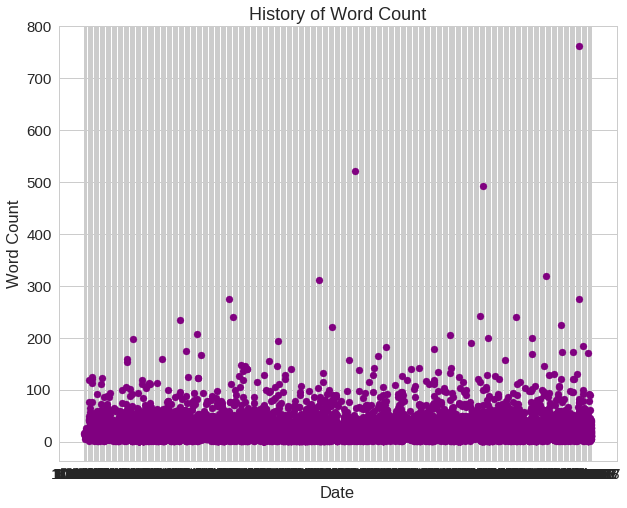

In [6]:
# matplotlibdate format modules
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# set parameters so all plots are consistent
plt.rcParams['figure.figsize'] = (8, 8)

# prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df['Opened Date'], 
       df['word_count'].values,
       color='purple')
ax.set(xlabel="Date", ylabel="Word Count")
ax.set(title="History of Word Count");

In [7]:
#Filter out blank descriptions
df_new = df[df['Description'].notnull()]

#Calculate avg word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df_new['avg_word'] = df_new['Description'].apply(lambda x: avg_word(x))
df_new[['Description','avg_word']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Description,avg_word
0,Please tag account to my name as I am prospect...,4.266667
1,"Hi Team,\nThis prospect is mistagged to me, it...",5.555556
2,Current owner is inactive.,5.750000
3,Not in my Anaplan.,3.750000
4,Account owner is inactive tag account to my name,4.444444


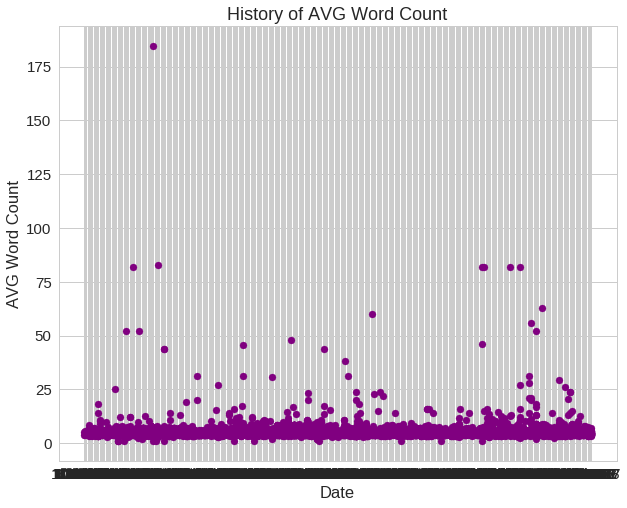

In [8]:
# set parameters so all plots are consistent
plt.rcParams['figure.figsize'] = (8, 8)

# prettier plotting with seaborn
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df_new['Opened Date'], 
       df_new['avg_word'].values,
       color='purple')
ax.set(xlabel="Date", ylabel="AVG Word Count")
ax.set(title="History of AVG Word Count");

In [0]:
#df['text length'] = df['Description'].apply(len)
#df.head()

In [10]:
#make text lowercase
df['Description'] = df['Description'].astype(str).apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Description'].head()

0    please tag account to my name as i am prospect...
1    hi team, this prospect is mistagged to me, its...
2                           current owner is inactive.
3                                   not in my anaplan.
4     account owner is inactive tag account to my name
Name: Description, dtype: object

In [11]:
#remove punctuation
df['Description'] = df['Description'].str.replace('[^\w\s]','')
df['Description'].head()

0    please tag account to my name as i am prospect...
1    hi team this prospect is mistagged to me its i...
2                            current owner is inactive
3                                    not in my anaplan
4     account owner is inactive tag account to my name
Name: Description, dtype: object

In [12]:
#remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Description'] = df['Description'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Description'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    please tag account name prospecting adrian ina...
1    hi team prospect mistagged minnesota anaplan p...
2                               current owner inactive
3                                              anaplan
4              account owner inactive tag account name
Name: Description, dtype: object

In [13]:
pd.Series(' '.join(df['Description']).lower().split()).value_counts()[:100]

account        8201
please         7769
team           5895
hi             3780
thanks         3445
change         1918
thank          1796
name           1708
owner          1233
tag            1180
territory      1067
tagged          864
prospect        855
anaplan         840
move            840
transfer        823
company         742
longer          709
merge           709
need            698
hey             679
sales           652
customer        652
rep             629
manager         610
parent          586
could           582
hello           543
working         537
accounts        521
               ... 
make            234
lost            229
david           229
advise          224
advance         223
already         222
dave            219
attached        219
transferred     217
retag           216
im              216
client          208
needs           206
order           202
support         201
approval        200
regards         193
two             189
outbound        188


In [14]:
#checking top 10 common words
freq = pd.Series(' '.join((df['Description'])).split()).value_counts()[:10]
freq

account    8201
please     7769
team       5895
hi         3780
thanks     3445
change     1918
thank      1796
name       1708
owner      1233
tag        1180
dtype: int64

In [15]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df2 = df['Description'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))
df2.head()

0    pleas tag account name prospect adrian inact user
1    hi team prospect mistag minnesota anaplan plea...
2                                  current owner inact
3                                              anaplan
4                 account owner inact tag account name
Name: Description, dtype: object

In [0]:
#Lemmatization
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer

#lm = WordNetLemmatizer()
#df2 = df['Description'].apply(lambda x: ' '.join([lm.lemmatize(word) for word in x.split()]))
#df2.head()

In [18]:
pd.Series(' '.join(df2).lower().split()).value_counts()[:100]

account      8735
pleas        7771
team         5947
thank        5242
hi           3780
chang        2265
tag          2109
name         1771
move         1292
owner        1264
prospect     1245
territori    1112
transfer     1068
need          979
manag         899
merg          893
work          848
anaplan       840
assign        827
compani       825
custom        736
longer        709
rep           693
hey           679
sale          675
parent        658
could         582
reassign      545
hello         543
request       543
             ... 
switch        250
attach        245
also          244
quot          244
list          242
advis         239
per           235
confirm       235
seat          235
advanc        233
david         232
contact       231
lost          229
client        224
alreadi       222
dave          219
show          219
support       218
im            216
regard        215
look          209
group         206
servic        205
lead          200
base      

In [0]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

In [23]:
df['Type'].unique()

array(['Request to Change Account Owner', 'Other Territory Requests',
       'Request Update for Sales Parent',
       'Request Change to Existing Territory',
       'Request Lost BA Exception',
       'Request to Reassign Prospect Account (ASR Only)',
       'Request Further Territory Information', 'Request New Territory',
       'Request List Upload Services', 'Request New Sales Parent',
       'Request Manual Fencing Adjustment',
       'Request New/Update Special Master (Pub Sec, Multi Currency, etc.)',
       'Request Update for Master or Location', '-',
       'Request Account Update', 'Account Verification',
       'Account Management 1', 'New Web Account Hold',
       'Request eCommerce Support', nan, 'Account Management 2',
       'Request Update for Horizon Contact', 'Account Management 3',
       'Request Order Change', 'Info on Bids, Rebates, Pricing',
       'Request Manual Invoice, Resend, Adjust, Credit/Rebill',
       'Request to Internal Operations (Operations Use Only

In [0]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = df['Description'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [25]:
word_features = vectorizer.get_feature_names()
word_features[550:575]

['221972',
 '222001',
 '22209',
 '222468',
 '2229',
 '222979',
 '2235',
 '2240',
 '225',
 '225145',
 '225496',
 '225696',
 '226591',
 '226651',
 '228212',
 '228269',
 '228591',
 '228622',
 '228934',
 '229320',
 '229674',
 '229847',
 '22999',
 '22dec16',
 '23']

In [0]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [27]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

['aa',
 'aaa',
 'aaaview',
 'aabview',
 'aacview',
 'aafview',
 'aaiview',
 'aanaplan',
 'aanaplanthank',
 'aanview',
 'aaoview',
 'aarcwest',
 'aaron',
 'ab',
 'abandon',
 'abb',
 'abbasi',
 'abbott',
 'abc',
 'abd',
 'abdullah',
 'abhijit',
 'abhow',
 'abil',
 'abilitylab',
 'abl',
 'ableto',
 'abnorm',
 'abob',
 'abonnementshttpswwwsoftchoicecomsubscribestorefrca',
 'abram',
 'absa',
 'absenc',
 'absorb',
 'absorv',
 'ac',
 'academi',
 'acapleas',
 'acc',
 'acccount',
 'accel',
 'accentur',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accnt',
 'accommod',
 'accomod']

In [0]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

In [29]:
kmeans = KMeans(n_clusters = 15, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=5, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : lead, account, cisco, event, vendor, work, team, upload, thank, pleas
1 : reassign, pleas, territori, account, appropri, thank, rep, haputhanthri, kaushalya, bailey
2 : owner, chang, account, pleas, thank, team, hi, hey, territori, majaj
3 : sled, account, pleas, team, advanc, okay, illinoi, dave, chang, ownership
4 : parent, sale, sp, master, pleas, team, merg, compani, hi, account
5 : sp, merg, pleas, duplic, team, thank, account, hi, dupe, master
6 : hi, account, team, pleas, thank, chang, ownership, advis, verifi, retag
7 : thank, team, pleas, account, good, georgia, gerard, given, global, gonzal
8 : anaplan, tag, pleas, upload, spunar, team, chris, thank, fahey, erin
9 : assign, pleas, scott, account, territori, vuilleumi, thank, hi, ob, prospect
10 : sara, gourd, hey, team, thank, account, assign, brodi, pleas, chang
11 : transfer, pleas, account, hi, team, thank, prospect, praveen, manag, longer
12 : tag, team, account, pleas, thank, hi, prospect, alex, hey, rep
13 : smart, 

In [0]:
df['cluster'] = kmeans.labels_

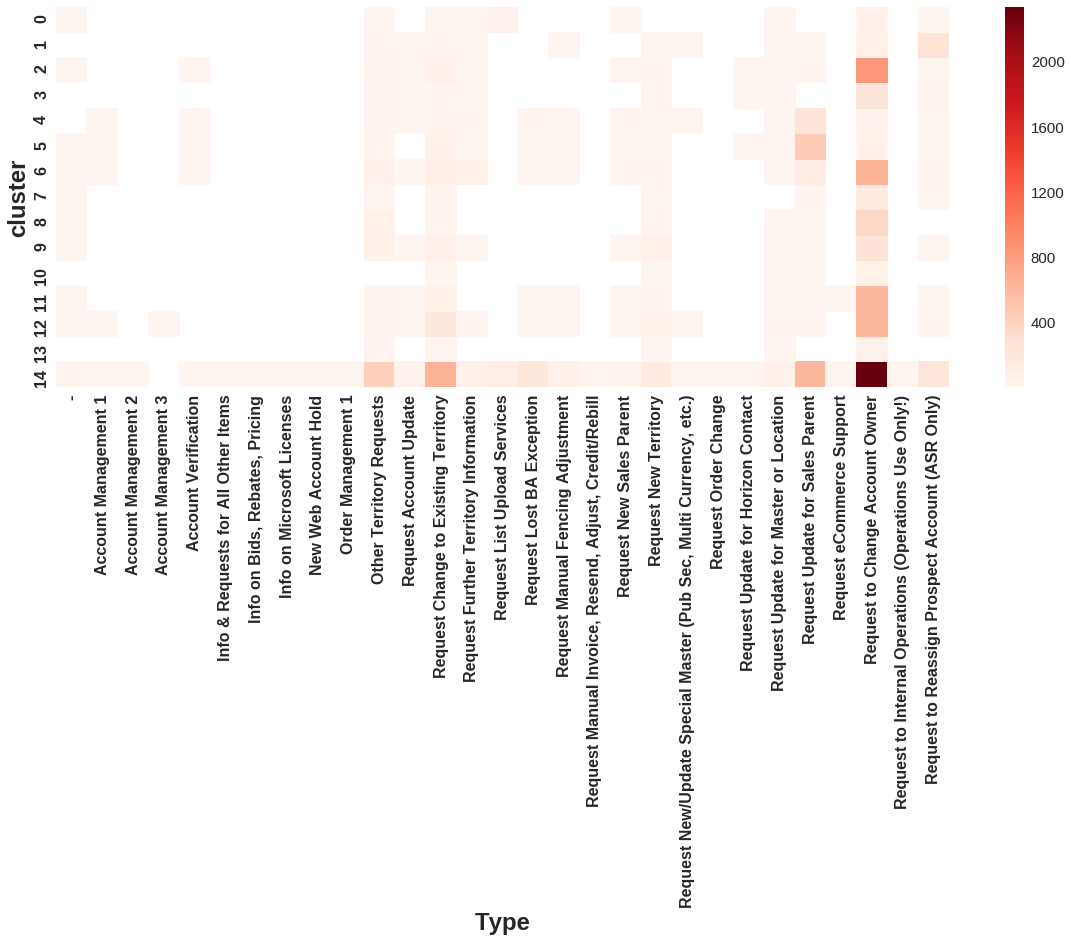

In [40]:
clusters = df.groupby(['cluster', 'Type']).size()
fig2, ax2 = plt.subplots(figsize = (20, 7))
sns.heatmap(clusters.unstack(level = 'Type'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('Type', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")